# Numerical solution of the Kuramoto-Sivashinsky Equation using Fourier spectral methods

Equations are taken from this paper: https://engineeringresearch.org/index.php/GJRE/article/view/1140/1072

In [1]:
using DifferentialEquations,FFTW,Plots, LSODA

In [2]:
N = 64
L = 1
k = ifftshift( 2π .* (-N÷2 : N÷2-1))
k2 = @. k^2
k4 = @. k^4
x = 0:L/(N-1):L;

In [3]:
function û(u,k,N)
    j = 0:1/(N-1):1
    X = exp.(-2 .*im .* (k * transpose(j)))
    return sum( u .* X, dims=2)
end

û (generic function with 1 method)

In [4]:
function Kuramoto!(du, u, p, t)
    N, L = p
    uk = û(u,k,N)
    uf = fft(u .+ 0im)
    duk = @. (k2 - k4)*uk-im*k/2*uf
    X = exp.(π .*im .* (x * transpose(k)) ./L)
    du[1:end] = real.(sum((duk .* u .* im .*k .* π ./L) .* X, dims=2))
end

Kuramoto! (generic function with 1 method)

In [5]:
u0 = exp.(cos.(x./2))
p = [N,L]
tspan = (0.0, 60);

In [6]:
prob = ODEProblem(Kuramoto!, u0, tspan, p);

In [7]:
sol = solve(prob,lsoda(),dt=2e-10);

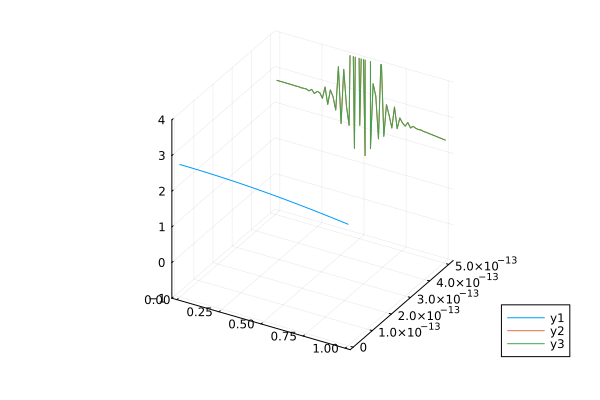

In [8]:
plot(x,ones(N) .* sol.t[1],sol.u[1],zlims=(-1,4))
plot!(x,ones(N) .* sol.t[500],sol.u[500])
plot!(x,ones(N) .* sol.t[1000],sol.u[1000])

In [9]:
length(sol.t)

2239